А/А-тестирование мобильного приложения.
Необходимо посчитать результаты A/A-теста, проверяя метрику качества False Positive Rate(FPR). Будем проверять на конверсии в покупку.   
Известно, что сплит-система сломана. Требуется проверить утверждение о поломке и найти ее причины, если сплит-система действительно сломана.

Дан массив - результат работы сплит-системы:  
    
    uid – уникальный id клиента
    experimentVariant – в контрольную или тестовую группу попал данный id (0 и 1 соответственно)
    version – версия мобильного приложения (всего их 4)
    purchase - произошла ли покупка или нет


In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/396012/hw_aa.csv',sep=';')
# формируем 2 отдельные выборки по результатам сплита, которые и будем сравнивать.
control_1 = df.query("experimentVariant == '0'") 
control_2 = df.query("experimentVariant == '1'")

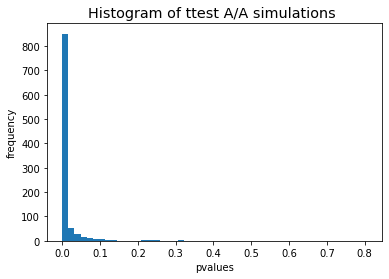

0.935

In [3]:
# cделаем случайные выборки по 1000 значений (в обоих массивах чуть больше 63 тысяч значений) 
# проверим гипотезу о равенстве средних с помощью Т-теста.

simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = control_1['purchase'].sample(n_s, replace = False)
    s2 = control_2['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) < 0.05) / simulations

Это не так - превышает. Система сплитования не работает должным образом.  
Распределения двух групп значимо различаются.   
Посмотрим конверсию в каждой из контрольных групп в зависимости от версии мобильного приложения 

In [4]:
# в группе 1
conversion_control_1 = control_1.groupby('version',as_index=False)\
                      .agg({'purchase':'sum','uid':'count'})\
                      .rename(columns={'purchase':'purchases_number','uid':'clients_number'}) 
conversion_control_1['conversion'] = conversion_control_1.purchases_number / conversion_control_1.clients_number
conversion_control_1

,version,purchases_number,clients_number,conversion
0,v2.8.0,41,41283,0.000993
1,v2.9.0,890,11921,0.074658
2,v3.7.4.0,252,4204,0.059943
3,v3.8.0.0,328,5694,0.057604


In [5]:
# в группе 2
conversion_control_2 = control_2.groupby('version',as_index=False)\
                      .agg({'purchase':'sum','uid':'count'})\
                      .rename(columns={'purchase':'purchases_number','uid':'clients_number'}) 
conversion_control_2['conversion'] = conversion_control_2.purchases_number / conversion_control_2.clients_number
conversion_control_2

,version,purchases_number,clients_number,conversion
0,v2.8.0,1895,41552,0.045606
1,v2.9.0,858,12033,0.071304
2,v3.7.4.0,266,4221,0.063018
3,v3.8.0.0,384,6110,0.062848


В группе 1 для версии v2.8.0 - очень низкая конверсия по сравнению с группой 2 (раз в 50).   
А ведь около 2/3 клиентов именно с  этой версией.   
Посмотрим на p-value различия распределений между двумя группами для каждой версии мобильного приложения отдельно

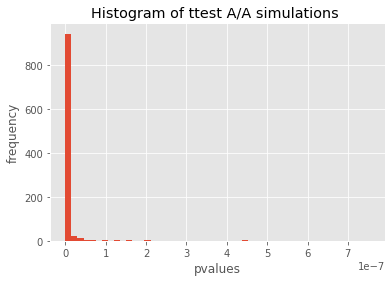

In [6]:
# версия v2.8.0
res = []
for i in tqdm(range(simulations)):
    s1 = control_1.query("version == 'v2.8.0'")['purchase'].sample(n_s, replace = False)
    s2 = control_2.query("version == 'v2.8.0'")['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

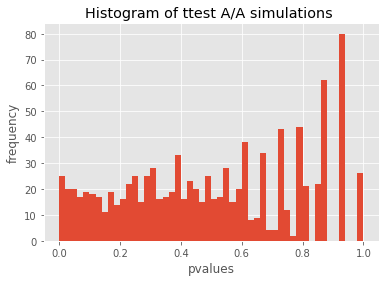

In [7]:
# версия v2.9.0
res = []
for i in tqdm(range(simulations)):
    s1 = control_1.query("version == 'v2.9.0'")['purchase'].sample(n_s, replace = False)
    s2 = control_2.query("version == 'v2.9.0'")['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

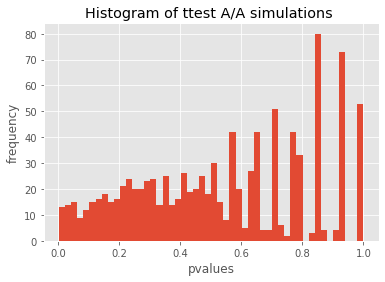

In [8]:
# версия v3.7.4.0
res = []
for i in tqdm(range(simulations)):
    s1 = control_1.query("version == 'v3.7.4.0'")['purchase'].sample(n_s, replace = False)
    s2 = control_2.query("version == 'v3.7.4.0'")['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

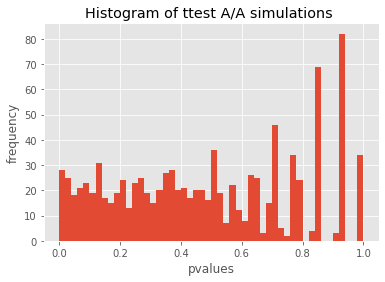

In [9]:
# версия v3.8.0.0
res = []
for i in tqdm(range(simulations)):
    s1 = control_1.query("version == 'v3.8.0.0'")['purchase'].sample(n_s, replace = False)
    s2 = control_2.query("version == 'v3.8.0.0'")['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

Наши догадки по версии v2.8.0 подтверждаются. Две группы, образованные сплит-системой, значимо различаются.  
Исключаем эту версию из обеих контрольных групп

In [10]:
control_1_updated = control_1.query("version != 'v2.8.0'")
control_2_updated = control_2.query("version != 'v2.8.0'")

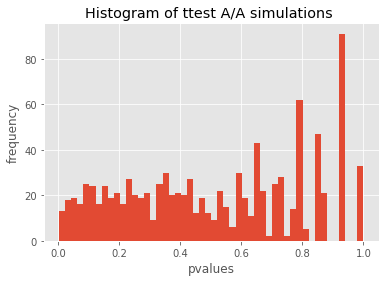

0.038

In [11]:
# проводим A/A тест с обновленными контрольными группами
res = []
for i in tqdm(range(simulations)):
    s1 = control_1_updated['purchase'].sample(n_s, replace = False)
    s2 = control_2_updated['purchase'].sample(n_s, replace = False)
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

False Positive Rate теперь в норме и сплит-система разбивает наш массив пользователей корректно.  
Но нам от этого не легче, ведь за бортом наших возможных экспериментов останутся 2/3 пользователей.  
Надо чинить сплит-систему  